In [156]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

128 128


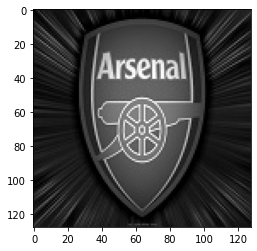

In [157]:
img_path = 'Arsenal1.jpg'
img = cv2.imread(img_path,0)
h,w = img.shape[:2]
print(w,h)
plt.imshow(img,cmap='gray')

128 128


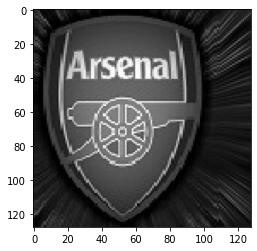

In [158]:
img_path = 'Arsenal2.jpg'
img2 = cv2.imread(img_path,0)
h2,w2 = img.shape[:2]
print(w2,h2)
plt.imshow(img2,cmap='gray')

In [159]:
img_res = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
height,width = img_res.shape[:2]
print(height,width)

img_res2 = cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_REFLECT)
height2,width2 = img_res2.shape[:2]
print(height2,width2)

130 130
130 130


In [160]:
def lbp(M,i_ref,j_ref):
    ref_value = M[i_ref][j_ref]
    bin_val = ""
    #0
    if M[i_ref-1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #1
    if M[i_ref-1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #2
    if M[i_ref-1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #3
    if M[i_ref][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #4
    if M[i_ref+1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #5
    if M[i_ref+1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #6
    if M[i_ref+1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #7 
    if M[i_ref][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    dec_val = int(bin_val,2) 
    #print(dec_val)
    return dec_val

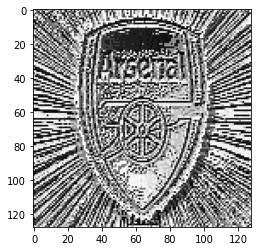

In [148]:
img_lbp = np.zeros((h,w))

for i in range(1,height-1):
    for j in range(1,width-1):
        img_lbp[i-1][j-1] = lbp(img_res,i,j)
cv2.imwrite('img_lbp.jpg', img_lbp)
plt.imshow(img_lbp,cmap='gray')

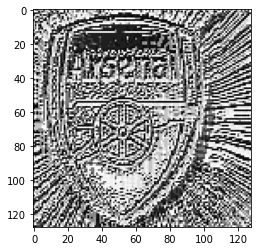

In [161]:
img_lbp2 = np.zeros((h2,w2))

for i in range(1,height2-1):
    for j in range(1,width2-1):
        img_lbp2[i-1][j-1] = lbp(img_res2,i,j)
cv2.imwrite('img_lbp2.jpg', img_lbp2)
plt.imshow(img_lbp2,cmap='gray')

In [162]:
def create_regions(test_image,bloc_size_r,bloc_size_c):
    regions = []
    for r in range(0,test_image.shape[0], bloc_size_r):
        for c in range(0,test_image.shape[1], bloc_size_c):
            window = test_image[r:r+bloc_size_r,c:c+bloc_size_c]
            regions.append(window)
    return np.array(regions)


In [163]:
# grey_levels = 256
# test_image = np.random.randint(0,grey_levels, size=(8,8))
# print(test_image)
bloc_size_r = 8
bloc_size_c = 8
regions = []
regions = create_regions(img_lbp,bloc_size_c,bloc_size_r)
print(regions)
regions2 = []
regions2 = create_regions(img_lbp2,bloc_size_c,bloc_size_r)
print(regions2)

[[[249. 120.  72. ...  76. 255. 114.]
  [249. 252.  88. ...  90.   4. 239.]
  [247.  50. 121. ... 127.  10. 157.]
  ...
  [255. 222.  14. ... 253.  88.   8.]
  [ 15.  55.  91. ... 170. 253.  88.]
  [  9.  13. 255. ... 255.  42. 117.]]

 [[ 72. 205. 255. ... 201. 255. 122.]
  [255. 132.  23. ... 218.   0. 255.]
  [ 54.   8. 141. ... 255.  80. 160.]
  ...
  [127.  10. 173. ... 133. 255. 126.]
  [128. 127.  10. ...   0. 135. 115.]
  [ 88. 128. 127. ...  95. 136. 239.]]

 [[ 68. 251. 120. ... 255.  64. 255.]
  [ 72. 255. 118. ...  58.  88. 133.]
  [ 93.   8.  39. ... 255. 114.   8.]
  ...
  [ 72. 255.  32. ... 127.   8. 253.]
  [209. 176. 121. ... 181. 122.   0.]
  [255. 254. 248. ...   8. 255. 122.]]

 ...

 [[247.   8. 247. ... 135.  67. 167.]
  [167. 223.   0. ... 128. 215. 130.]
  [135. 167.  95. ...  88. 132. 223.]
  ...
  [ 72. 133. 135. ... 182. 112. 120.]
  [253. 128. 129. ...  34. 255. 254.]
  [252. 124. 196. ... 223. 156.  63.]]

 [[111. 255.   0. ...  72. 133. 207.]
  [135. 183.

In [164]:
def get_desc(regions):
    descriptor = []
    hist = []
    for r in regions :
        temp = r.ravel().tolist()
        # print(temp)
        for i in range(256):
            hist.append(temp.count(i))
    descriptor.extend(hist)
    return descriptor

In [165]:
descriptor = get_desc(regions)
# print(descriptor)
descriptor2 = get_desc(regions2)
# print(descriptor2)

In [166]:
from sklearn.metrics import mean_squared_error
mean_squared_error(descriptor,descriptor2)

0.890899658203125

In [97]:
# regions = []
# bloc_size = 8
# hits_num = 1
# for i in range(0,h-bloc_size,bloc_size):
#     for j in range(0,w-bloc_size,bloc_size):
#         regions.append(img_lbp[i:i+bloc_size,j:j+bloc_size])
# print(len(regions))
# for r in regions : 
#     plt.hist(r,256,[0,256])
#     plt.show()